# Task 6

##### **References**

- **Random_Oversampler** : https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html
- **MinMaxScaler** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
- **To_Categorical** : https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
- **Keras Tuner** : https://keras.io/getting_started/


### Initial Imports:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from keras import utils # This for random seed
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , RobustScaler , OrdinalEncoder , LabelEncoder , StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import f1_score

utils.set_random_seed(42)


### Data loading and exploration:

In [ ]:
df = pd.read_csv('predictive_maintenance.csv')

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='Target'>

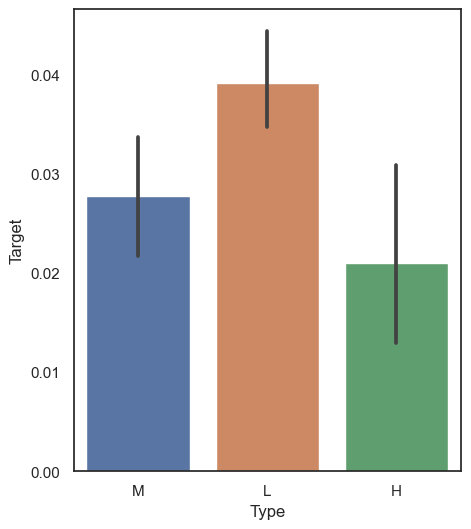

In [ ]:
sns.barplot(x=df['Type'], y= df['Target'])


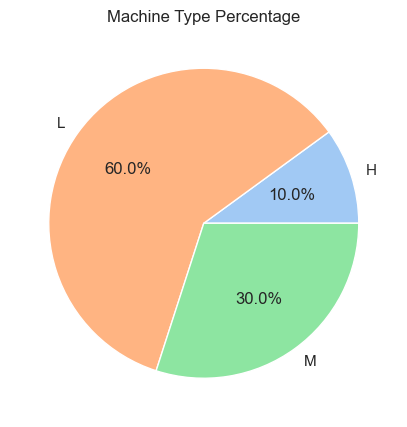

In [ ]:
qtd_product_type = df[['Product ID','Type']].groupby('Type').count().reset_index()

sns.set(rc={'figure.figsize':(5,6)})
colors = sns.color_palette('pastel')
g = plt.pie(x=qtd_product_type['Product ID'],
    labels=qtd_product_type['Type'],colors = colors, autopct='%.1f%%')

plt.title("Machine Type Percentage")
plt.show()

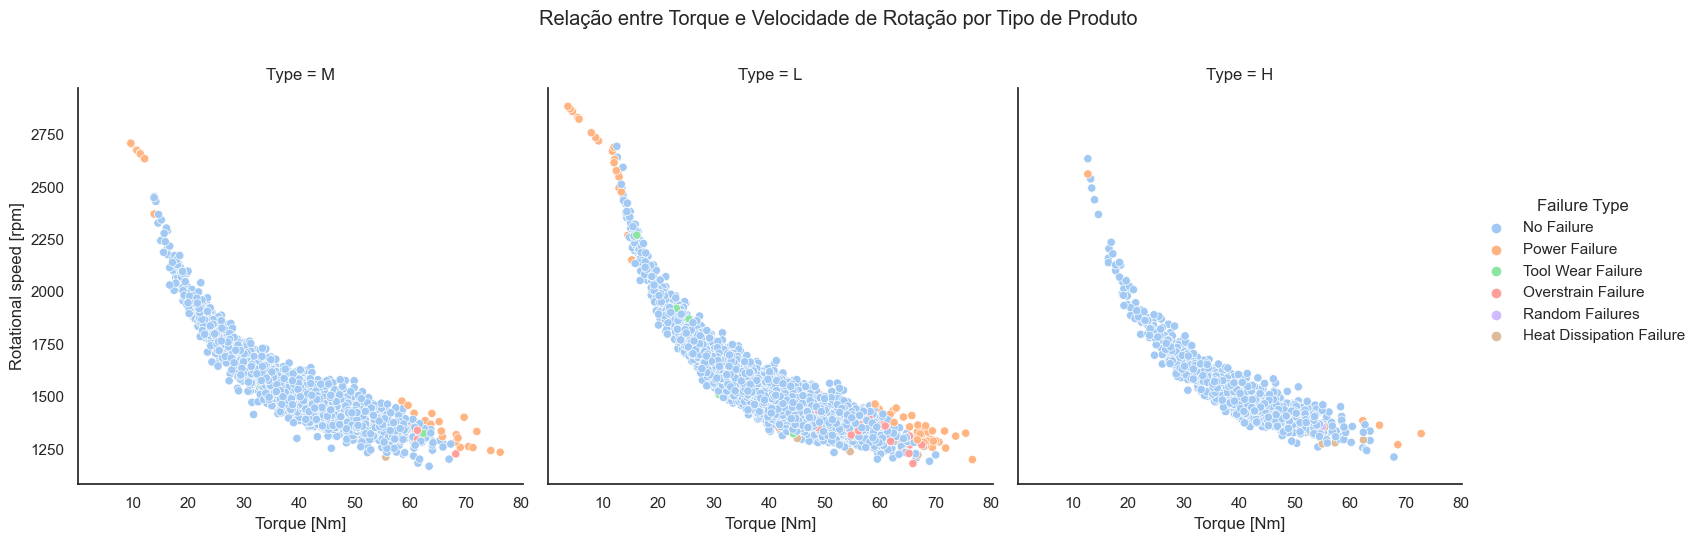

In [ ]:
sns.set_style("white")
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='pastel');
plt.suptitle("Relação entre Torque e Velocidade de Rotação por Tipo de Produto", y=1.08)
sns.despine()
plt.show()

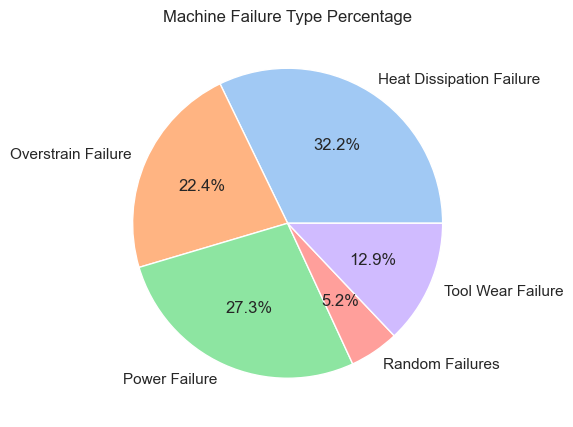

In [ ]:
qtd_failure = df[['Target','Failure Type']].loc[(df['Failure Type'] != 'No Failure')
                                                   ].groupby('Failure Type').count().reset_index()
sns.set(rc={'figure.figsize':(5,6)})
colors = sns.color_palette('pastel')
g = plt.pie(x=qtd_failure['Target'],
    labels=qtd_failure['Failure Type'],colors = colors, autopct='%.1f%%')

plt.title("Machine Failure Type Percentage")

plt.show()

C:\Users\adami\AppData\Local\Temp\ipykernel_15664\613908855.py:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type', palette=['#E9C0CB', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], ax=ax[0])
C:\Users\adami\AppData\Local\Temp\ipykernel_15664\613908855.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df[df['Target'] == 1], x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type', palette=['#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], ax=ax[1])


Text(0.5, 1.0, 'Excluding class no failure')

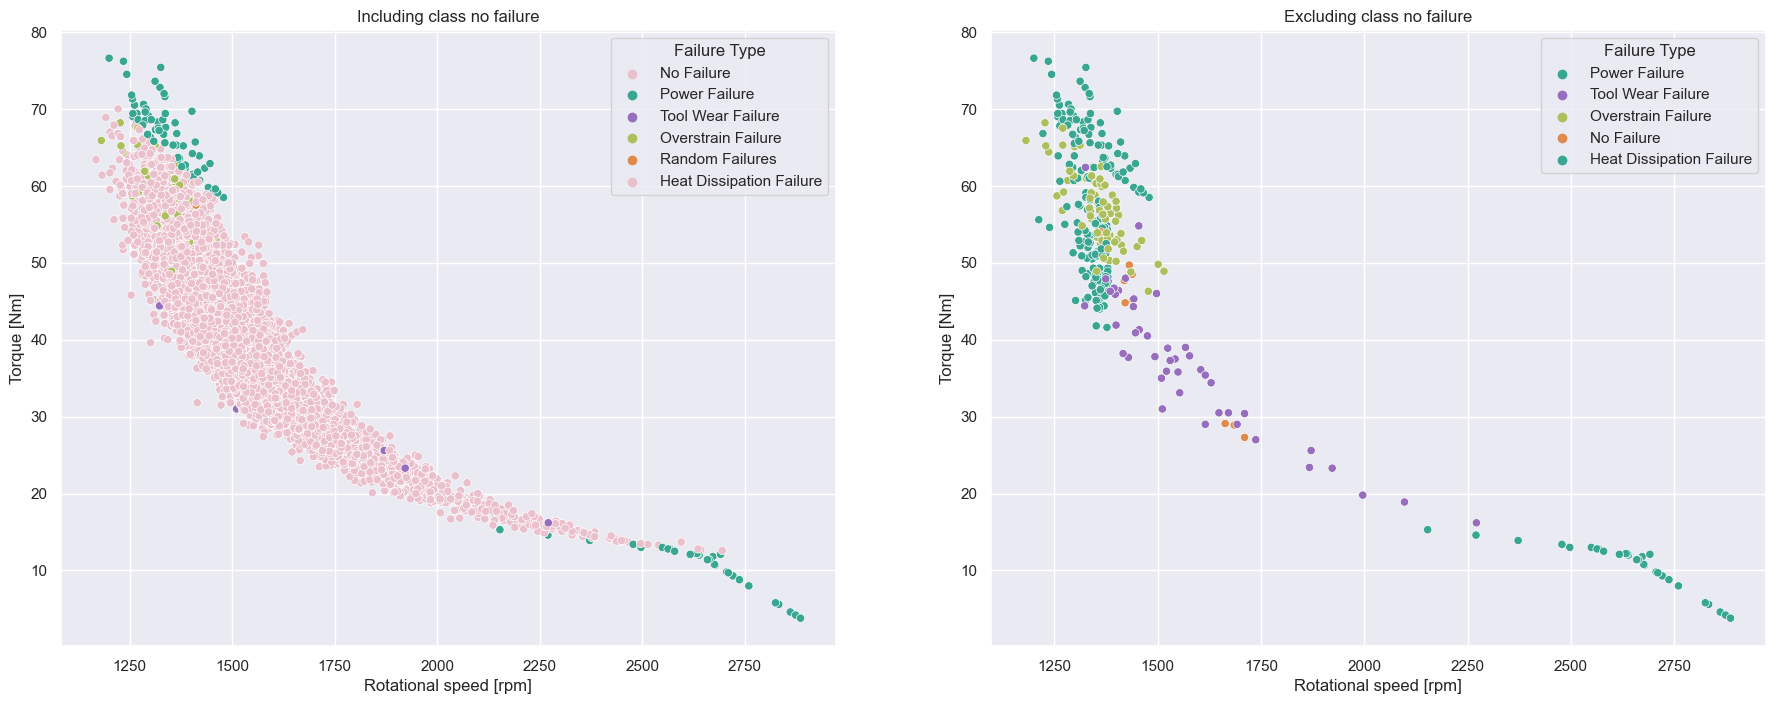

In [ ]:
fig, ax = plt.subplots(1,2, figsize=[22,8])
plt.title('Rot. Speed vs Torque wrt Failure Type')
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type', palette=['#E9C0CB', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], ax=ax[0])
sns.scatterplot(data=df[df['Target'] == 1], x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type', palette=['#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], ax=ax[1])

ax[0].set_title('Including class no failure')
ax[1].set_title('Excluding class no failure')

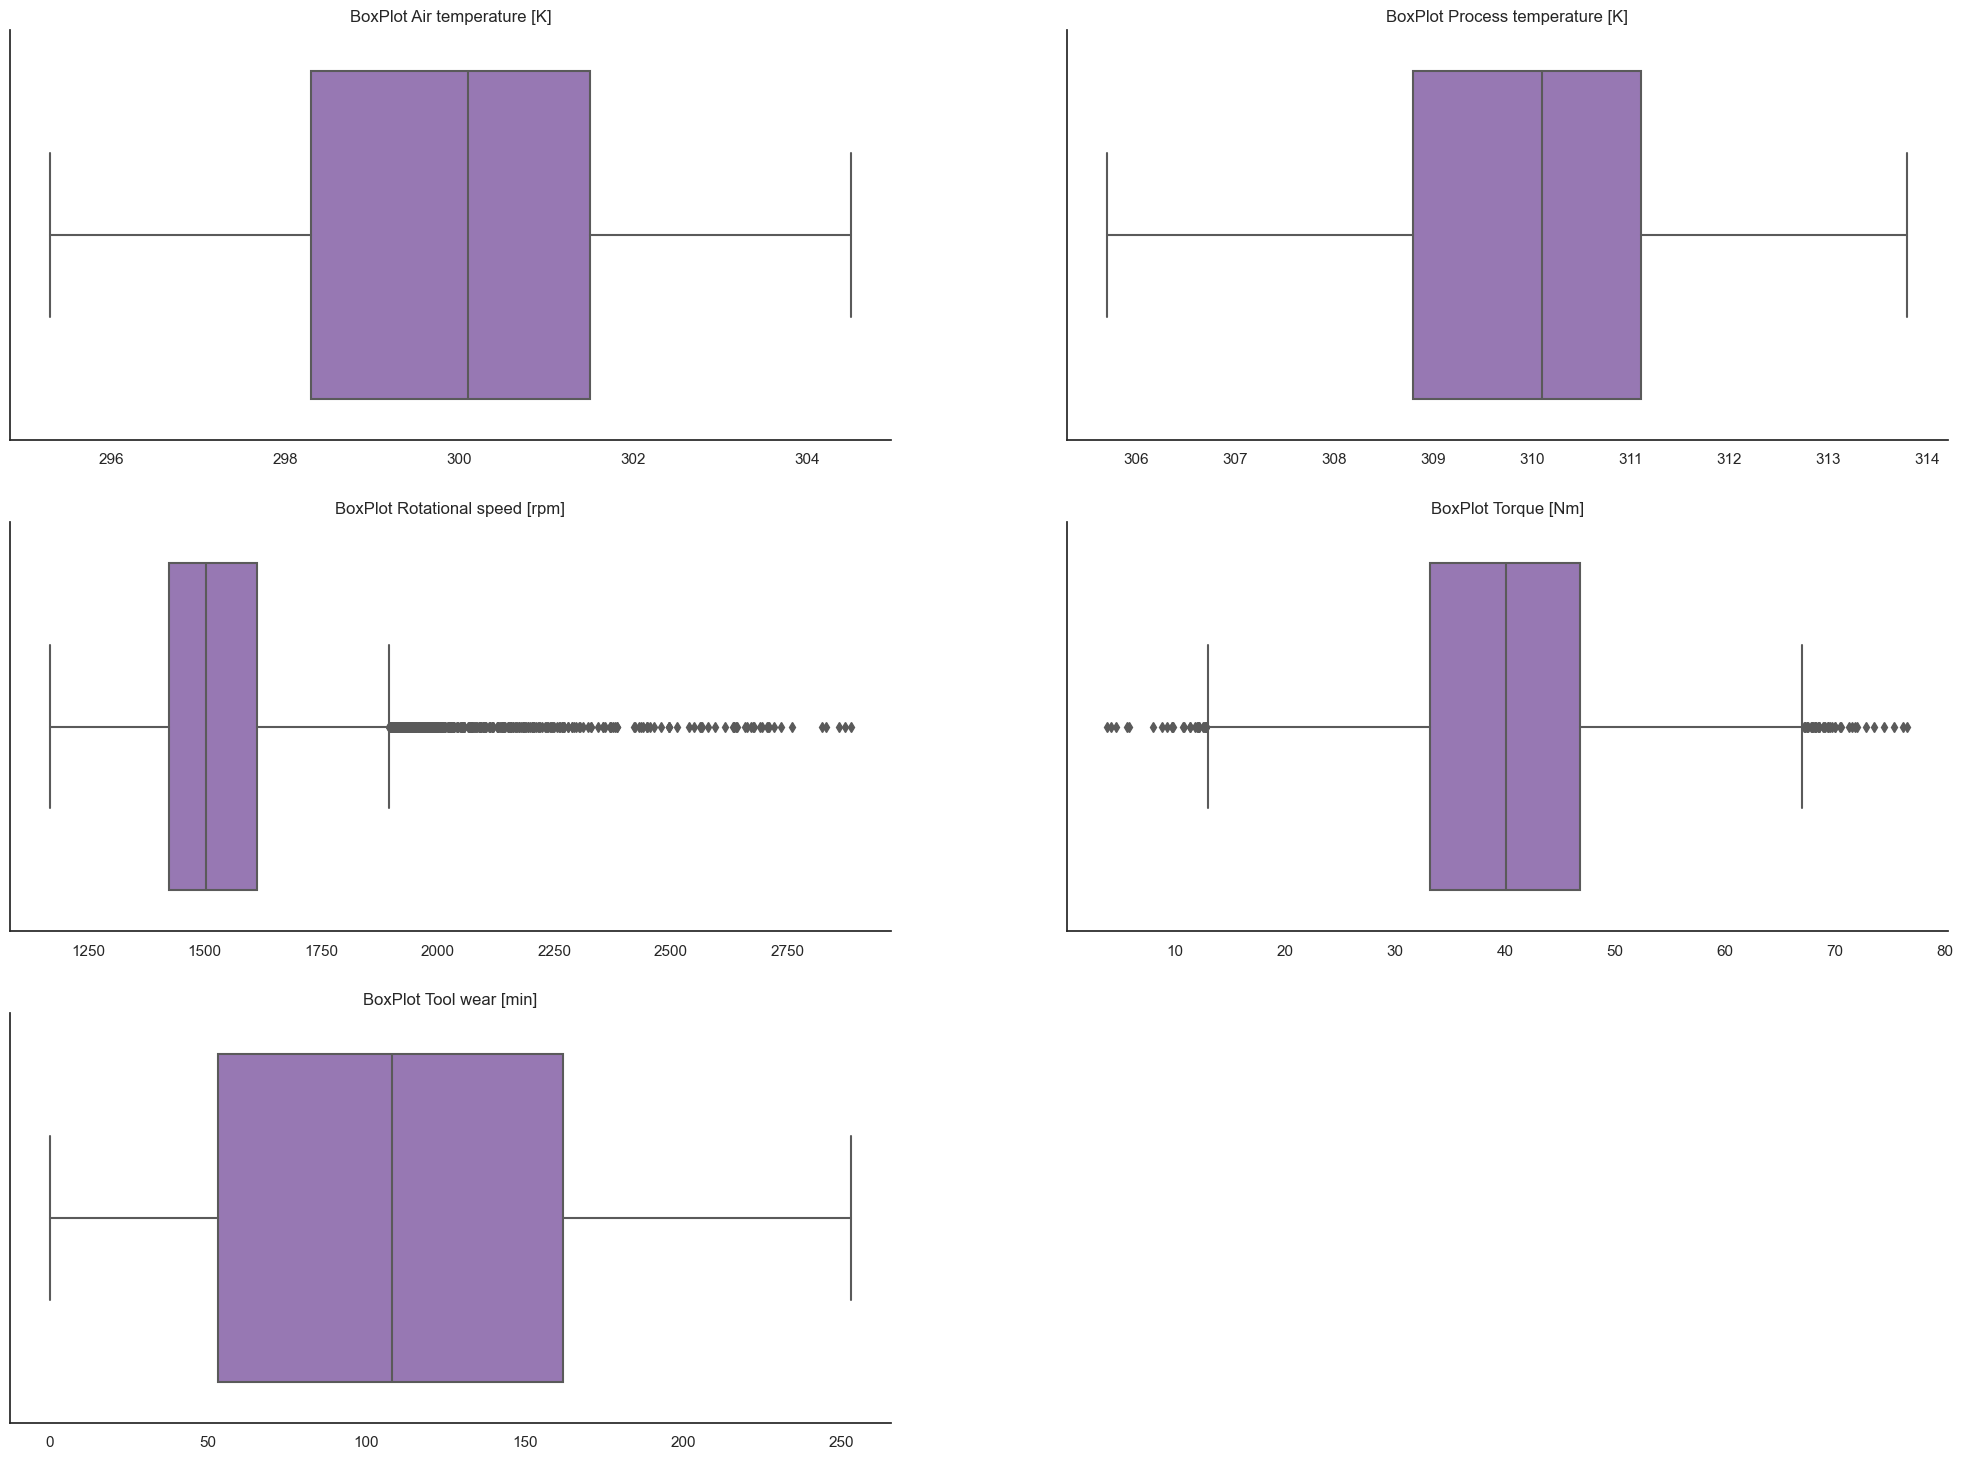

In [ ]:
columns_number = df.drop(columns=['Target', 'UDI']).select_dtypes(exclude=['object']).columns

plt.figure(figsize=(25, 50))
sns.set_style("white")
col_count = 1

for col in columns_number[:10]:
    plt.subplot(8, 2, col_count)
    sns.boxplot(x=df[col], color='#a1c9f4', palette=[ '#976EBD'])

    plt.title(f'BoxPlot {col}')
    plt.xlabel('')
    plt.ylabel('')

    col_count += 1

sns.despine()
plt.show()

### Feature Engineering:

In [ ]:
# Calcualte Temperature difference [K]
df['Temperature Difference [K]'] = df['Process temperature [K]'] - df['Air temperature [K]']
# Calculate Power [W]
df['Power [W]'] = df['Torque [Nm]'] * (df['Rotational speed [rpm]'] / 60) * (2 * np.pi)

# Calculate Torque-Speed Ratio
df['Torque-Speed Ratio'] = df['Torque [Nm]'] / df['Rotational speed [rpm]']

# Create Interaction Term
df['Torque_Speed_Interact'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']

### Dealing with contradicting data:

In [ ]:
print('\nClassification of failed machine but no failure of failure type:')
countnofailure = df.query("Target == 1 and `Failure Type` == 'No Failure'")[['Failure Type', 'Target']]

display(countnofailure)

print(30*'-')
print('\nMachine classification without failure but with failure type:')
countfailure = df.query("Target == 0 and `Failure Type` != 'No Failure'")[['Failure Type', 'Target']]

display(countfailure)


Classification of failed machine but no failure of failure type:


,Failure Type,Target
1437,No Failure,1
2749,No Failure,1
4044,No Failure,1
4684,No Failure,1
5536,No Failure,1
5941,No Failure,1
6478,No Failure,1
8506,No Failure,1
9015,No Failure,1


------------------------------

Machine classification without failure but with failure type:


,Failure Type,Target
1221,Random Failures,0
1302,Random Failures,0
1748,Random Failures,0
2072,Random Failures,0
2559,Random Failures,0
3065,Random Failures,0
3452,Random Failures,0
5471,Random Failures,0
5489,Random Failures,0
5495,Random Failures,0


In [ ]:
df.drop(df[(df['Target'] == 1) & (df['Failure Type'] == 'No Failure')].index, inplace=True)
df.drop(df[(df['Target'] == 0) & (df['Failure Type'] != 'No Failure')].index, inplace=True)

**We drop the Target column because it is essentially the same as Failure Type**
| Target | Failure Type|
|--------|-------------|
| 0| No Failure|
|1 | Heat Dissipation Failure|
| 1 | Power Failure|
| 1 | Overstrain Failure|
| 1 | Tool Wear Failure|

| Encoder| Failure Type|
|--------|-------------|
| 0| No Failure|
|1 | Heat Dissipation Failure|
| 2 | Power Failure|
| 3 | Overstrain Failure|
| 4 | Tool Wear Failure|

so we have 5 clasess

### Encoding columns:

In [ ]:
ord_enc_type = OrdinalEncoder(categories=[['L', 'M', 'H']])
df['Type'] = ord_enc_type.fit_transform(df[['Type']])
label_enc_failure = LabelEncoder()
df['Failure Type'] = label_enc_failure.fit_transform(df['Failure Type'])
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature Difference [K],Power [W],Torque-Speed Ratio,Torque_Speed_Interact
0,1,M14860,1.0,298.1,308.6,1551,42.8,0,0,1,10.5,6951.590560,0.027595,66382.8
1,2,L47181,0.0,298.2,308.7,1408,46.3,3,0,1,10.5,6826.722724,0.032884,65190.4
2,3,L47182,0.0,298.1,308.5,1498,49.4,5,0,1,10.4,7749.387543,0.032977,74001.2
3,4,L47183,0.0,298.2,308.6,1433,39.5,7,0,1,10.4,5927.504659,0.027565,56603.5
4,5,L47184,0.0,298.2,308.7,1408,40.0,9,0,1,10.5,5897.816608,0.028409,56320.0


In [ ]:
df['Failure Type'] = df['Failure Type'].replace({1: 0, 0: 1})

In [ ]:
# df = df[df['Failure Type'] != 4]

### Dropping unnecessary columns and splitting data:

In [ ]:
X = df.drop(['Failure Type', 'Target' , 'UDI' , 'Product ID'], axis=1)
y = df['Failure Type']

In [ ]:
from sklearn.model_selection import ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42 , stratify=y_train, shuffle=True)
# X_train_val, X_test, y_train_val, y_test = ShuffleSplit(X, y,test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = ShuffleSplit(X_train_val, y_train_val, test_size=0.3, random_state=42 )

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(3490, 10)

### Oversampling

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, RandomOverSampler, SMOTE
# smote = SMOTE()
# smote = BorderlineSMOTE()

# X_balanced, y_balanced = smote.fit_resample(X_train_scaled, y_train)
# print("New distribution of the target variable after balancing:")
# print(pd.Series(y_balanced).value_counts())

oversample = RandomOverSampler(sampling_strategy='minority')
X_balanced, y_balanced = oversample.fit_resample(X_train_scaled, y_train)
X_balanced, y_balanced = oversample.fit_resample(X_balanced, y_balanced)
X_balanced, y_balanced = oversample.fit_resample(X_balanced, y_balanced)
X_balanced, y_balanced = oversample.fit_resample(X_balanced, y_balanced)


In [ ]:
print(pd.Series(y_balanced).value_counts())

Failure Type
0    3375
3    3375
1    3375
2    3375
4    3375
Name: count, dtype: int64


In [ ]:
y_balanced.shape

(16875,)

In [ ]:
X_balanced.shape

(16875, 10)

### Modeling:

#### creating one hot encoded version of the target

In [ ]:
from keras.utils import to_categorical
y_balanced_encoded = to_categorical(y_balanced)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)


#### Label encoding model:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
import keras
from keras.layers import Dropout
from keras.regularizers import L2
from keras.callbacks import EarlyStopping


mc_model = Sequential()
mc_model.add(Dense(400, activation='relu', input_shape=(X_balanced.shape[1],)))
mc_model.add(Dropout(0.2))
mc_model.add(Dense(300, activation='relu', kernel_regularizer=L2(0.01)))
mc_model.add(Dropout(0.1))
mc_model.add(Dense(200, activation='relu', kernel_regularizer=L2(0.01)))
mc_model.add(Dropout(0.05))

mc_model.add(Dense(5, activation='softmax'))

weights = {0: 0.1,
            1: 1.,
            2: 1.,
            3: 1.,
            4: 1.
            }



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

mc_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = mc_model.fit(X_balanced,
                       y_balanced,
                       epochs=100,
                       batch_size=32,
                       class_weight= weights,
                       callbacks=[early_stopping],
                       validation_data=(X_valid_scaled, y_val),
                       verbose=1 )


test_loss, test_accuracy = mc_model.evaluate(X_valid_scaled, y_val)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


c:\Users\adami\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6399 - loss: 1.9882 - val_accuracy: 0.0301 - val_loss: 2.8125
Epoch 2/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7568 - loss: 0.3412 - val_accuracy: 0.1661 - val_loss: 2.1604
Epoch 3/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8062 - loss: 0.2761 - val_accuracy: 0.3389 - val_loss: 1.9956
Epoch 4/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8482 - loss: 0.2326 - val_accuracy: 0.4302 - val_loss: 1.7174
Epoch 5/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8687 - loss: 0.2090 - val_accuracy: 0.5208 - val_loss: 1.4403
Epoch 6/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8857 - loss: 0.1828 - val_accuracy: 0.4976 - val_loss: 1.6327
Epoch 7/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8908 - loss: 0.1689 - val_accuracy: 0.5829 - val_loss: 1.2943
Epoch 8/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8972 - loss: 0.1657 - val_acc

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import time
import numpy as np
start_time = time.time()
test_predictions = np.argmax(mc_model.predict(X_test_scaled), axis=-1)

print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

conf_matrix = confusion_matrix(y_test, test_predictions)



94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2893
           1       0.22      1.00      0.36        34
           2       0.21      0.96      0.34        23
           3       0.26      1.00      0.42        29
           4       0.04      0.69      0.07        13

    accuracy                           0.83      2992
   macro avg       0.35      0.89      0.42      2992
weighted avg       0.97      0.83      0.88      2992

Time taken to predict the model 0.7508029937744141


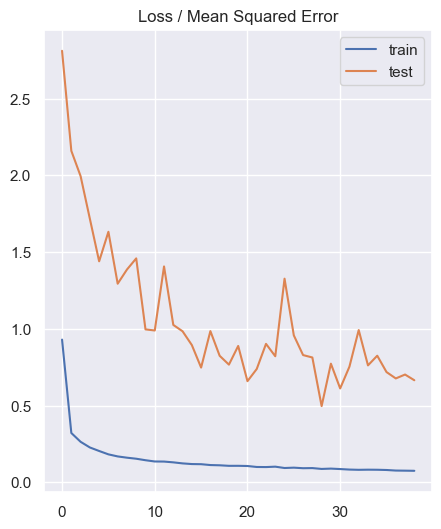

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

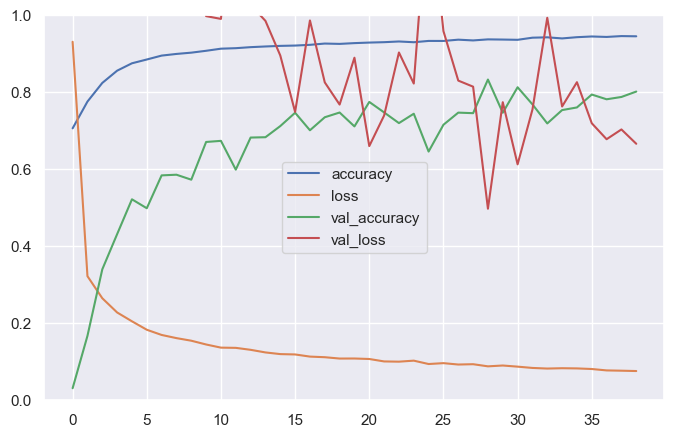

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### One hot encoding model:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
import keras
from keras.layers import Dropout
from keras.regularizers import L2
from keras.callbacks import EarlyStopping


mc_model2 = Sequential()
mc_model2.add(Dense(400, activation='relu', input_shape=(X_balanced.shape[1],)))
mc_model2.add(Dropout(0.2))
mc_model2.add(Dense(300, activation='relu', kernel_regularizer=L2(0.01)))
mc_model2.add(Dropout(0.1))
mc_model2.add(Dense(200, activation='relu', kernel_regularizer=L2(0.01)))
mc_model2.add(Dropout(0.05))

mc_model2.add(Dense(5, activation='softmax'))

weights = {0: 0.1,
            1: 1.,
            2: 1.,
            3: 1.,
            4: 1.
            }



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

mc_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = mc_model2.fit(X_balanced,
                       y_balanced_encoded,
                       epochs=100,
                       batch_size=32,
                       class_weight= weights,
                       callbacks=[early_stopping],
                       validation_data=(X_valid_scaled, y_val_encoded),
                       verbose=1 )


test_loss, test_accuracy = mc_model2.evaluate(X_valid_scaled, y_val_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


c:\Users\adami\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6347 - loss: 1.9906 - val_accuracy: 0.0321 - val_loss: 2.8117
Epoch 2/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7641 - loss: 0.3390 - val_accuracy: 0.2094 - val_loss: 2.2030
Epoch 3/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8153 - loss: 0.2733 - val_accuracy: 0.3042 - val_loss: 2.1365
Epoch 4/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8490 - loss: 0.2354 - val_accuracy: 0.4489 - val_loss: 1.6949
Epoch 5/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8724 - loss: 0.2020 - val_accuracy: 0.5302 - val_loss: 1.4495
Epoch 6/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8853 - loss: 0.1866 - val_accuracy: 0.6299 - val_loss: 1.0627
Epoch 7/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8912 - loss: 0.1732 - val_accuracy: 0.6193 - val_loss: 1.1374
Epoch 8/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8943 - loss: 0.1680 - val_acc

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import time
import numpy as np
start_time = time.time()
test_predictions = np.argmax(mc_model2.predict(X_test_scaled), axis=-1)

print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

conf_matrix = confusion_matrix(y_test, test_predictions)



45/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      2893
           1       0.26      1.00      0.41        34
           2       0.25      0.96      0.40        23
           3       0.27      0.97      0.43        29
           4       0.05      0.77      0.10        13

    accuracy                           0.86      2992
   macro avg       0.37      0.91      0.45      2992
weighted avg       0.97      0.86      0.90      2992

Time taken to predict the model 0.44710755348205566


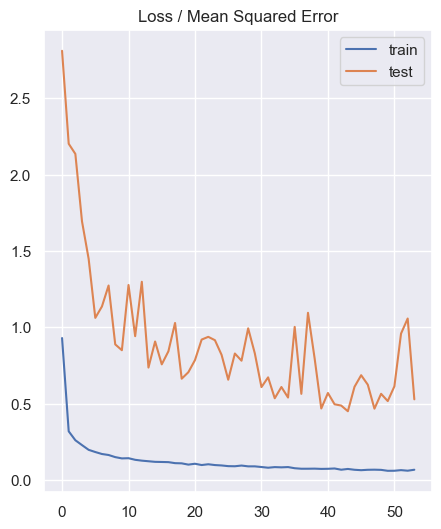

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

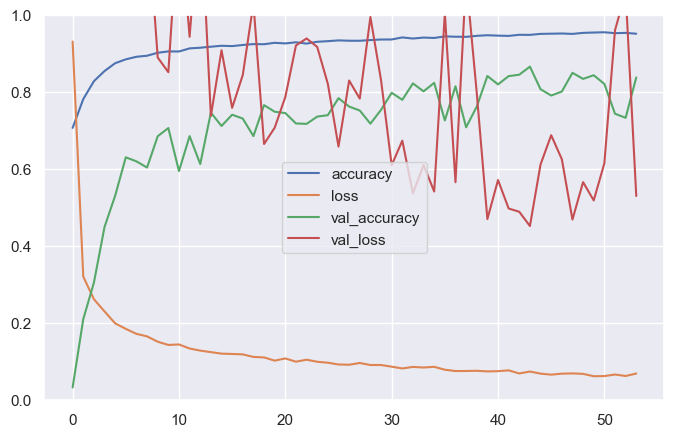

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Hyper Parameter tuning with Keras_Tuner:

#### One hot encoded model tuning:

In [ ]:
import keras
from keras import layers
import keras_tuner
import numpy as np

def call_existing_code_oh(units, activation, dropout, lr, num_layers, ):
    model = keras.Sequential()
    model.add(layers.Dense(units=units, activation=activation))
    for i in range(num_layers):
        model.add(layers.Dense(units=units, activation=activation))
        if dropout:
            model.add(layers.Dropout(rate=0.25))
    model.add(Dense(5, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


def build_model_oh(hp):
    num_layers = hp.Int('num_layers', 1, 5)
    units = hp.Int("units", min_value=100, max_value=500, step=50)
    activation = hp.Choice("activation", ["relu"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code_oh(
        units=units, activation=activation, dropout=dropout, lr=lr, num_layers=num_layers
    )
    return model



In [ ]:
tuner_oh = keras_tuner.RandomSearch(
    hypermodel=build_model_oh,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
    directory="Models",
    project_name="predictive",
)

In [ ]:
tuner_oh.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 500, 'step': 50, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
tuner_oh.search(X_balanced, y_balanced_encoded, epochs=50, validation_data=(X_valid_scaled, y_val_encoded), callbacks=[early_stopping])

Trial 5 Complete [00h 01m 30s]
val_accuracy: 0.9653394222259521

Best val_accuracy So Far: 0.9722142815589905
Total elapsed time: 00h 04m 15s


In [ ]:
tuner_oh.results_summary()

Results summary
Results in Models\predictive
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 4
units: 200
activation: relu
dropout: False
lr: 0.001772507252479043
Score: 0.9722142815589905

Trial 4 summary
Hyperparameters:
num_layers: 2
units: 500
activation: relu
dropout: False
lr: 0.0005293391761557029
Score: 0.9653394222259521

Trial 0 summary
Hyperparameters:
num_layers: 1
units: 150
activation: relu
dropout: True
lr: 0.0006994846329049014
Score: 0.9610427021980286

Trial 2 summary
Hyperparameters:
num_layers: 1
units: 350
activation: relu
dropout: False
lr: 0.0013279102669134521
Score: 0.93869948387146

Trial 3 summary
Hyperparameters:
num_layers: 3
units: 150
activation: relu
dropout: False
lr: 0.0015453316687064683
Score: 0.9361214637756348


In [ ]:
models_oh = tuner_oh.get_best_models(num_models=2)
best_model_oh = models_oh[0]
best_model_oh.summary()

c:\Users\adami\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\Users\adami\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         2,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,005 (640.64 KB)

 Trainable params: 164,005 (640.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import time
import numpy as np
start_time = time.time()
test_predictions = np.argmax(best_model_oh.predict(X_test_scaled), axis=-1)

print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

conf_matrix = confusion_matrix(y_test, test_predictions)



 1/94 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2893
           1       0.64      0.82      0.72        34
           2       0.71      0.96      0.81        23
           3       0.69      0.83      0.75        29
           4       0.07      0.15      0.10        13

    accuracy                           0.97      2992
   macro avg       0.62      0.75      0.67      2992
weighted avg       0.98      0.97      0.98      2992

Time taken to predict the model 0.7503366470336914


#### Label endoded model tuning:

In [ ]:
import keras
from keras import layers
import keras_tuner
import numpy as np

def call_existing_code(units, activation, dropout, lr, num_layers):
    model = keras.Sequential()
    model.add(layers.Dense(units=units, activation=activation))
    for i in range(num_layers):
        model.add(layers.Dense(units=units, activation=activation))
        if dropout:
            model.add(layers.Dropout(rate=0.25))
    model.add(Dense(5, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


def build_model(hp):
    num_layers = hp.Int('num_layers', 1, 5)
    units = hp.Int("units", min_value=100, max_value=500, step=50)
    activation = hp.Choice("activation", ["relu"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, lr=lr, num_layers=num_layers
    )
    return model



In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
    directory="Models",
    project_name="predictive",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 500, 'step': 50, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
tuner.search(X_balanced, y_balanced, epochs=50, validation_data=(X_valid_scaled, y_val), callbacks=[early_stopping])

Trial 5 Complete [00h 01m 04s]
val_accuracy: 0.9596104025840759

Best val_accuracy So Far: 0.9653394222259521
Total elapsed time: 00h 04m 39s


In [ ]:
tuner.results_summary()

Results summary
Results in Models\predictive
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 2
units: 400
activation: relu
dropout: True
lr: 0.00014948684422968163
Score: 0.9653394222259521

Trial 4 summary
Hyperparameters:
num_layers: 1
units: 500
activation: relu
dropout: True
lr: 0.00042743529195715565
Score: 0.9596104025840759

Trial 3 summary
Hyperparameters:
num_layers: 3
units: 100
activation: relu
dropout: True
lr: 0.0013968619216753887
Score: 0.9553136825561523

Trial 0 summary
Hyperparameters:
num_layers: 2
units: 150
activation: relu
dropout: True
lr: 0.004511709522511237
Score: 0.9524491429328918

Trial 1 summary
Hyperparameters:
num_layers: 3
units: 100
activation: relu
dropout: True
lr: 0.0043925333029596605
Score: 0.9450014233589172


In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

c:\Users\adami\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\Users\adami\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,205 (1.25 MB)

 Trainable params: 327,205 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import time
import numpy as np
start_time = time.time()
test_predictions = np.argmax(best_model.predict(X_test_scaled), axis=-1)

print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

conf_matrix = confusion_matrix(y_test, test_predictions)



 1/94 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2893
           1       0.61      0.91      0.73        34
           2       0.83      0.87      0.85        23
           3       0.71      0.83      0.76        29
           4       0.07      0.31      0.12        13

    accuracy                           0.97      2992
   macro avg       0.64      0.78      0.69      2992
weighted avg       0.98      0.97      0.97      2992

Time taken to predict the model 0.6505386829376221


---